In [1]:
from permutated_CNN.model.ResNet_structure import *
from permutated_CNN.model.CNN_structure import *
## Pytorch Version
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd
import os
from sklearn.metrics import roc_curve, auc


In [2]:
batch_size = 64
input_shape = (1,100,200)
num_outputs = 10

In [3]:
# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

In [3]:
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)

# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

architecture_setting = model_parameters['resnet34']
# Initialize your model
# Define the path to the checkpoint file
# checkpoint_path = "./temperary_data_saver/model_checkpoints/02_12_00_08_01_duplicates_ResNet_18_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.085.pth"

checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_12_01_49_31_duplicates_ResNet_34_no_dropout_1e4/batch_best_model_0.057.pth"

model = ResNet(architecture_setting, in_channels=1, num_classes = num_outputs)

# Load the state dictionary from the checkpoint file
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into your model
model.load_state_dict(checkpoint)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (block1): Sequential(
    (0): Bottleneck(
      (relu): ReLU()
      (conv1_3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2_3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Bottleneck(
      (relu): ReLU()
      (conv1_3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [38]:

network_type = 'star'
print(network_type.upper())
# X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')
X_test = X_test[:, None, :, :]
y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
# print(y_test.value_counts())
y_test = y_test.iloc[:, 10:].values

test_dataset = RegressionDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

prediction_list = []
truth_list = []

test_loss = 0

model.eval()
with torch.no_grad():
    for test_inputs, test_targets in test_dataloader:
        # Transfer validation data to GPU
        test_inputs = test_inputs.to(device)
        prediction_tf = model.forward(test_inputs)
        test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
        predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
        prediction_list.append(predictions)
        truth_list.append(pd.DataFrame(test_targets.numpy()))
        

predictions = pd.concat(prediction_list, axis=0)
truth = pd.concat(truth_list, axis=0)
print((predictions.values - truth.values).mean())

STAR
-0.009440002


In [5]:
network_type = 'star'
print(network_type.upper())
# X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
X_test = np.load(f'/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/29_random_tree_gene_image.npy')

X_test = X_test[:, None, :, :]
y_test = pd.read_csv(f'/media/eeepc/3866FF5566FF127C/random_tree_data/random_tree_5_genes_2400000_records_2024_02_10_23_29_40/rates/29_concatenated_rates.csv')
# print(y_test.value_counts())
y_test = y_test.iloc[:, 10:].values 



STAR


In [43]:
test_dataset = RegressionDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

prediction_list = []
truth_list = []

test_loss = 0

model.eval()
with torch.no_grad():
    for test_inputs, test_targets in test_dataloader:
        # Transfer validation data to GPU
        test_inputs = test_inputs.to(device)
        prediction_tf = model.forward(test_inputs)
        test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
        predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
        prediction_list.append(predictions)
        truth_list.append(pd.DataFrame(test_targets.numpy()))
        

predictions = pd.concat(prediction_list, axis=0)
# predictions.columns = table_columns
truth = pd.concat(truth_list, axis=0)

print((predictions.values - truth.values).mean())

0.0033301667


In [44]:
pd.DataFrame(predictions.values - truth.values).std()

0    0.239034
1    0.236076
2    0.237289
3    0.238606
4    0.237354
5    0.237692
6    0.236713
7    0.236332
8    0.239271
9    0.236391
dtype: float32

In [4]:
def get_network_result(select_type, model, device, criterion, table_columns, batch_size=64):
    network_type = select_type
    print(network_type.upper())
    # X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
    X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')
    X_test = X_test[:, None, :, :]
    y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
    # print(y_test.value_counts())
    y_test = y_test.iloc[:, 10:].values

    

    test_dataset = RegressionDataset(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    prediction_list = []
    truth_list = []

    test_loss = 0

    model.eval()
    with torch.no_grad():
        for test_inputs, test_targets in test_dataloader:
            # Transfer validation data to GPU
            test_inputs = test_inputs.to(device)
            prediction_tf = model.forward(test_inputs)
            test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
            predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
            prediction_list.append(predictions)
            truth_list.append(pd.DataFrame(test_targets.numpy()))
            

    predictions = pd.concat(prediction_list, axis=0)
    predictions.columns = table_columns
    truth = pd.concat(truth_list, axis=0)
    truth.columns = table_columns

    return predictions, truth, network_type



def get_CI_predictions(select_type, predictions, truth, SEs, z_score, index):    
    print(f'{predictions.columns[index]}' , end = ' : ')
    # print(f'SEs {SEs}')
    # print(f'Z score {z_score}')
    CI_values = z_score * SEs
    # print(f'CI {round(CI_values.iloc[:, index],2)}')
    predict_p = (np.abs(predictions - truth).iloc[:, index] < CI_values.iloc[:, index].values.item())
    return predict_p


def get_compare_result(evolCCM_select, models, models_name, device, criterion, table_columns, batch_size):
    directory ='/home/eeepc/Documents/image_genes/'
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = [0.4040456, 0.4531348, 0.4104203, 0.3955997, 0.4090854, 0.4456595, 0.4339634, 0.4251135, 0.4557958, 0.4352029]

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

    plt.figure(figsize=(8, 6))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


    for model_id, model in enumerate(models):
        predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
        shape_index = 0
        x_axis = []
        y_axis = []

        # SEs_df_mle = (predictions - truth.iloc[:100,]).std()

        for z in z_score:
            predictions_edge = np.abs(predictions / 0.23) > z
            truth_edge = pd.melt(truth*2)
            predictions_edge = pd.melt(predictions_edge)
            conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
            # Extract values from the confusion matrix
            TN, FP, FN, TP = conf_matrix.ravel()

            # Calculate sensitivity and specificity
            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)
            # Calculate ROC curve
            fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

            # Calculate Area Under the Curve (AUC)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            x_axis.append(1 - specificity)
            y_axis.append(sensitivity)

        plt.plot(x_axis, y_axis, lw=2, label=f'{models_name[model_id]} CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'{evolCCM_select.upper()} Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    plt.show()

    # print(x_axis)
    return x_axis, y_axis
    

In [5]:

table_columns = ['beta_12', 'beta_13', 'beta_14', 'beta_15', 'beta_23', 'beta_24', 'beta_25', 'beta_34', 'beta_35', 'beta_45']

In [6]:
network_all_types = ['line', 'star', 'two_triangles', 'fully_connected']
network_all_types[:3]
batch_size = 64

LINE
0.0
0.1
0.2
0.3
0.4
0.51
0.61
0.71
0.81
0.91
1.01
1.11
1.21
1.31
1.41
1.52
1.62
1.72
1.82
1.92
2.02
2.12
2.22
2.32
2.42
2.53
2.63
2.73
2.83
2.93
3.03
3.13
3.23
3.33
3.43
3.54
3.64
3.74
3.84
3.94
4.04
4.14
4.24
4.34
4.44
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.56
5.66
5.76
5.86
5.96
6.06
6.16
6.26
6.36
6.46
6.57
6.67
6.77
6.87
6.97
7.07
7.17
7.27
7.37
7.47
7.58
7.68
7.78
7.88
7.98
8.08
8.18
8.28
8.38
8.48
8.59
8.69
8.79
8.89
8.99
9.09
9.19
9.29
9.39
9.49
9.6
9.7
9.8
9.9
10.0
STAR
0.0
0.1
0.2
0.3
0.4
0.51
0.61
0.71
0.81
0.91
1.01
1.11
1.21
1.31
1.41
1.52
1.62
1.72
1.82
1.92
2.02
2.12
2.22
2.32
2.42
2.53
2.63
2.73
2.83
2.93
3.03
3.13
3.23
3.33
3.43
3.54
3.64
3.74
3.84
3.94
4.04
4.14
4.24
4.34
4.44
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.56
5.66
5.76
5.86
5.96
6.06
6.16
6.26
6.36
6.46
6.57
6.67
6.77
6.87
6.97
7.07
7.17
7.27
7.37
7.47
7.58
7.68
7.78
7.88
7.98
8.08
8.18
8.28
8.38
8.48
8.59
8.69
8.79
8.89
8.99
9.09
9.19
9.29
9.39
9.49
9.6
9.7
9.8
9.9
10.0
TWO_TRIA

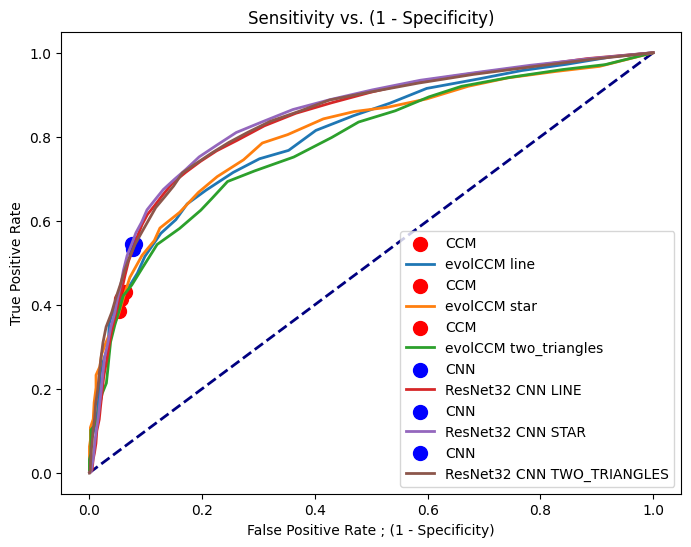

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


    # z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)

        if np.round(z,2) == 1.92:
            plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        print(np.round(z,2))
        if np.round(z,2) == 1.92:
            plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

LINE
STAR
TWO_TRIANGLES


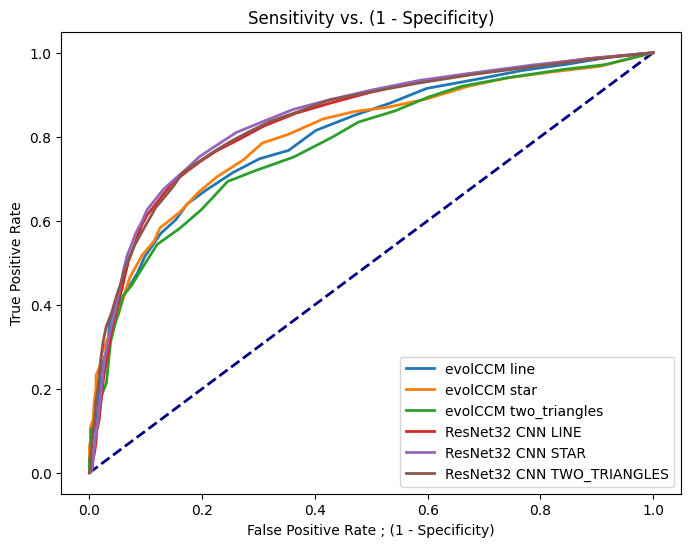

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


    # z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)

    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

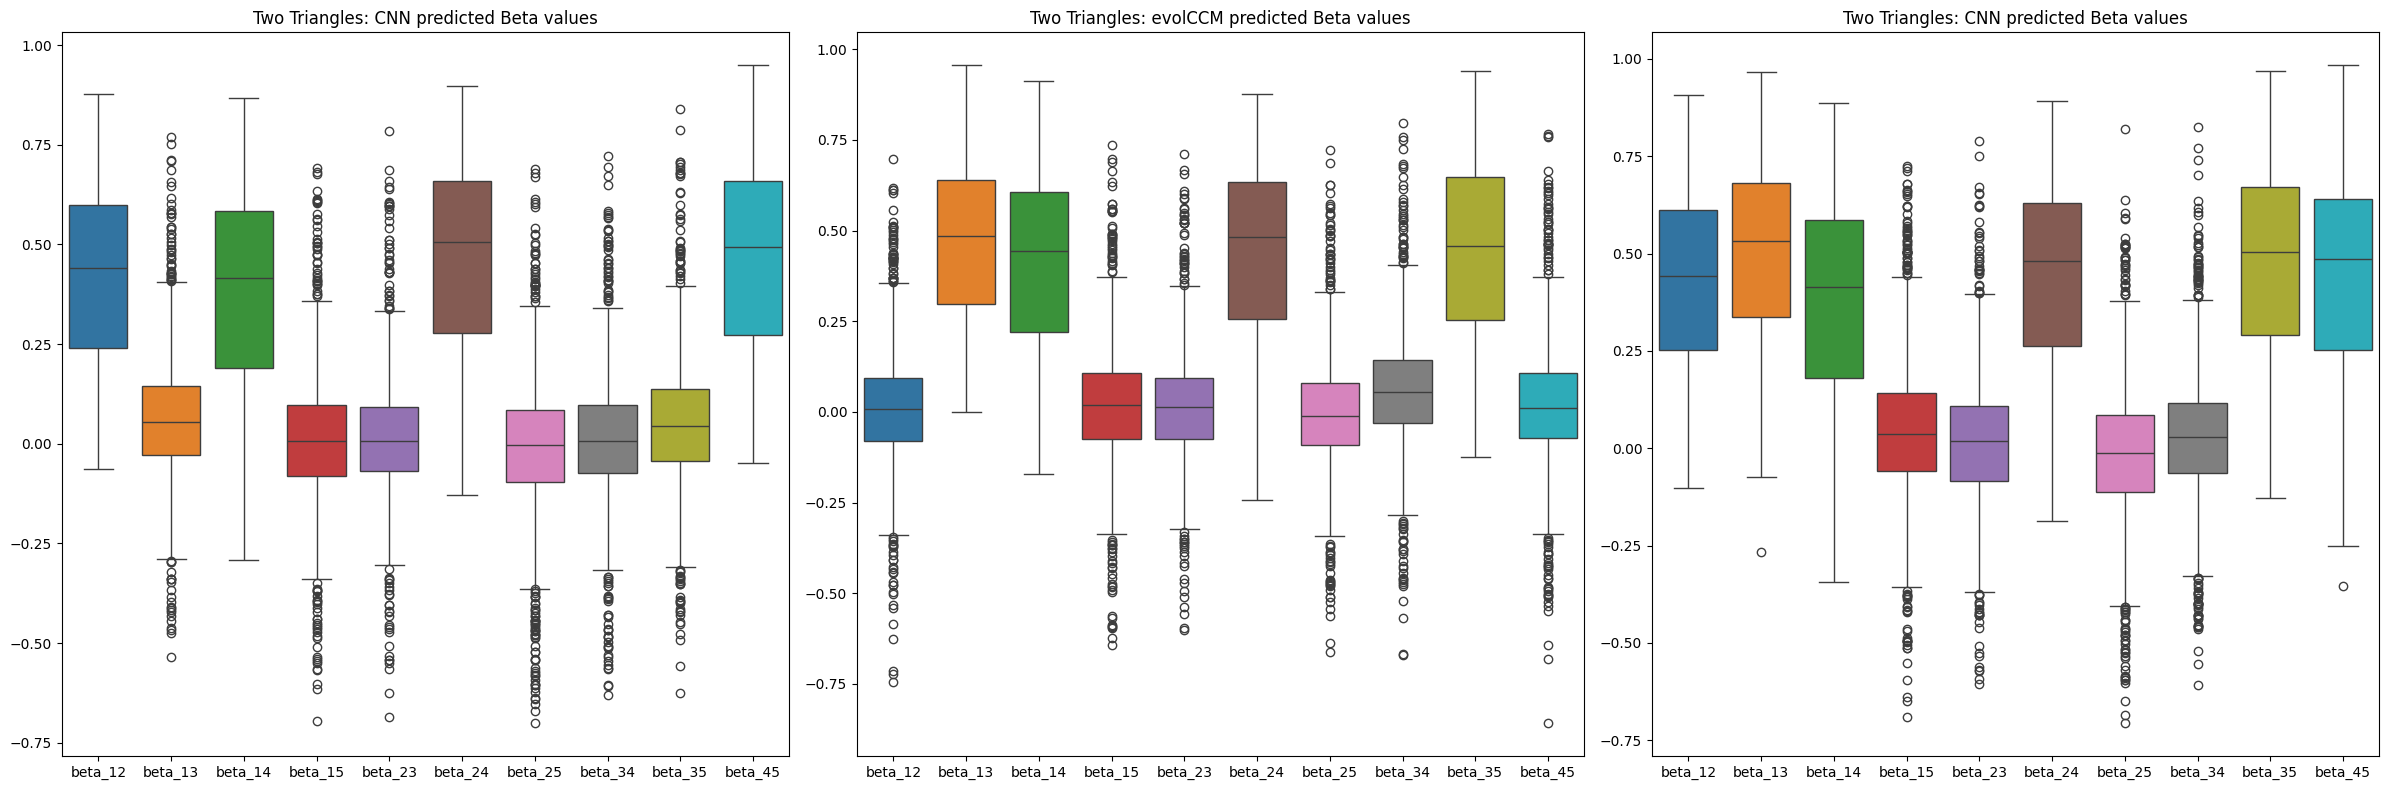

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)

# Plot the second boxplot in the second subplot
sns.boxplot(predictions_array[1], ax=axes[1])
axes[1].set_title('Two Triangles: evolCCM predicted Beta values')

# Plot the first boxplot in the first subplot
sns.boxplot(predictions_array[0], ax=axes[0])
axes[0].set_title('Two Triangles: CNN predicted Beta values')

sns.boxplot(predictions_array[2], ax=axes[2])
axes[2].set_title('Two Triangles: CNN predicted Beta values')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


STAR


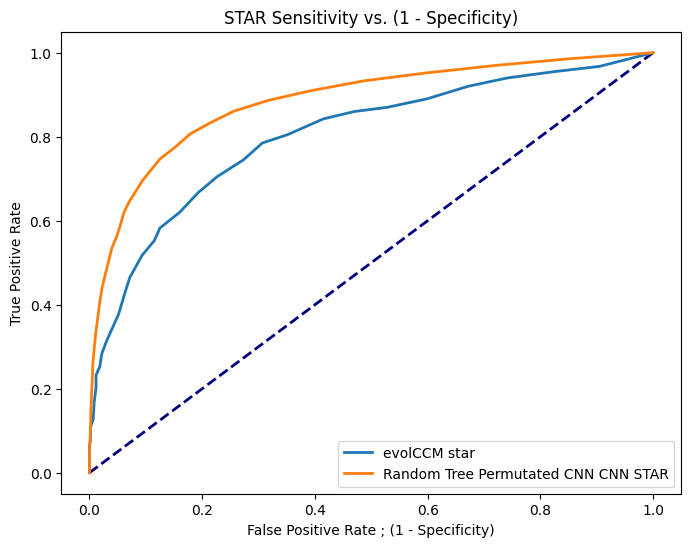

In [51]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[2]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'],  device, criterion, table_columns, batch_size)

TWO_TRIANGLES


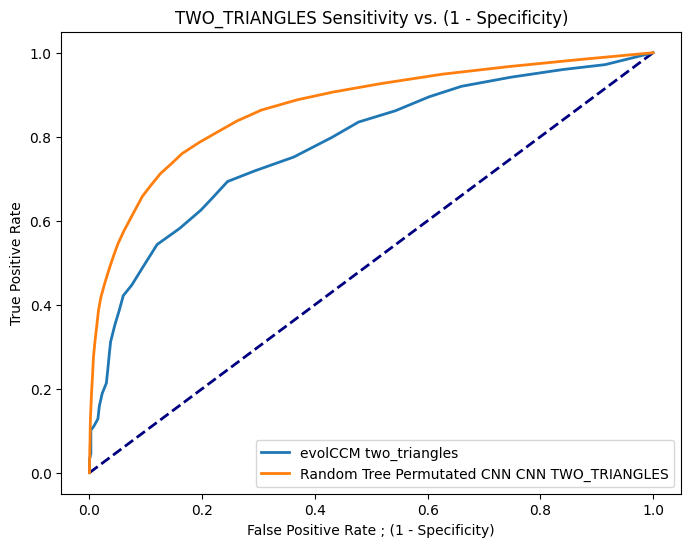

In [52]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[1]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'], device, criterion, table_columns, batch_size)

LINE


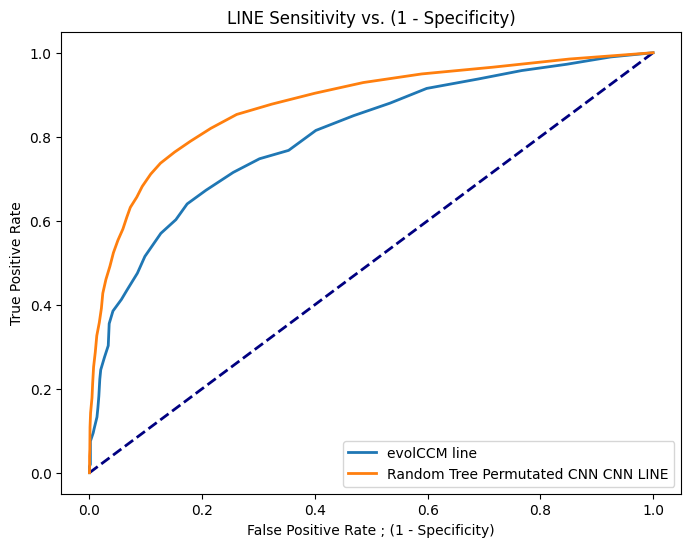

In [53]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[0]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'], device, criterion, table_columns, batch_size)